<a href="https://colab.research.google.com/github/ilham-mukti/harga-rumah-jakarta/blob/main/Bersihini_data_rumah_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geocoder

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
from geopy.geocoders import Nominatim 
sns.set_style("darkgrid")

In [ ]:
datas = pd.read_csv("/content/data_rumah_fix.csv")
datas.head()

,nama_rumah,kamar_mandi,kamar_tidur,luas_m2,harga,harga_m2,alamat,link
0,rumah baru patra kuningan,8,8,4617,300000000000,150000000,"patra, gatot subroto, kuningan, jakarta, Patra...",https://www.rumah.com/listing-properti/dijual-...
1,Hunian mewah 3 lantai di lengkapi Rooftop loka...,4,4,95,173000000000,2790322581,"jagakarsa, jakarta timur, Jagakarsa, Jakarta S...",https://www.rumah.com/listing-properti/dijual-...
2,"5 Bedrooms Rumah Kebayoran Baru, Jakarta Selat...",5,5,914,170000000000,175983437,"Kebayoran Baru, Jakarta Selatan, DKI Jakarta",https://www.rumah.com/listing-properti/dijual-...
3,Rumah Dijual Pondok Indah,5,5,1619,110000000000,68750000,"Pondok Indah, Pondok Indah, Jakarta Selatan, D...",https://www.rumah.com/listing-properti/dijual-...
4,Dijual rumah pangeran antasari mewah & Elite,6,5,936,102000000000,39968652,"jl pangeran antasari, Antasari, Jakarta Selata...",https://www.rumah.com/listing-properti/dijual-...


In [ ]:
print('Total duplicated rows:', datas.duplicated().sum())
datas.drop_duplicates(inplace=True)
datas.shape

Total duplicated rows: 14


(1898, 8)

In [ ]:
datas = datas.drop(datas[datas["nama_rumah"].str.contains("sewa")].index)
datas.shape

(1892, 8)

In [ ]:
datas['harga_kategori'] = pd.cut(datas['harga'], bins=[0, 1500000000, 3500000000, 5000000000, 10000000000, 20000000000, datas.harga.max()],
                                 labels=['0 - 1,5 M', '1,5 - 3,5 M', '3,5 - 5 M', '5 - 10 M', '10 - 20 M', '20 M - Max'])
datas.head()

,nama_rumah,kamar_mandi,kamar_tidur,luas_m2,harga,harga_m2,alamat,link,harga_kategori
0,rumah baru patra kuningan,8,8,4617,300000000000,150000000,"patra, gatot subroto, kuningan, jakarta, Patra...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max
1,Hunian mewah 3 lantai di lengkapi Rooftop loka...,4,4,95,173000000000,2790322581,"jagakarsa, jakarta timur, Jagakarsa, Jakarta S...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max
2,"5 Bedrooms Rumah Kebayoran Baru, Jakarta Selat...",5,5,914,170000000000,175983437,"Kebayoran Baru, Jakarta Selatan, DKI Jakarta",https://www.rumah.com/listing-properti/dijual-...,20 M - Max
3,Rumah Dijual Pondok Indah,5,5,1619,110000000000,68750000,"Pondok Indah, Pondok Indah, Jakarta Selatan, D...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max
4,Dijual rumah pangeran antasari mewah & Elite,6,5,936,102000000000,39968652,"jl pangeran antasari, Antasari, Jakarta Selata...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max


In [ ]:
datas.harga_kategori.value_counts()

1,5 - 3,5 M    430
10 - 20 M      379
5 - 10 M       361
0 - 1,5 M      345
20 M - Max     230
3,5 - 5 M      147
Name: harga_kategori, dtype: int64

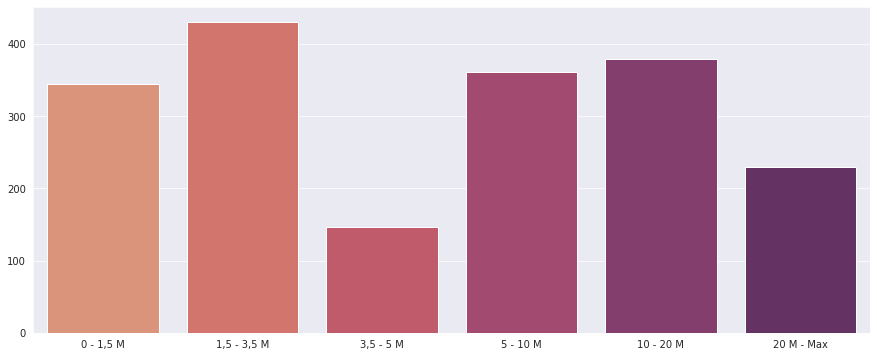

In [ ]:
harga_cat = datas.harga_kategori.value_counts()

plt.figure(figsize=(15,6))
sns.barplot(x=harga_cat.index, y=harga_cat.values, palette="flare")

In [ ]:
datas['harga_m2_kategori'] = pd.cut(datas['harga_m2'], bins=[0, 10000000, 15000000, 25000000, 30000000, datas.harga_m2.max()],
                                 labels=['0 - 10 Juta', '10 - 15 Juta', '15 - 25 Juta', '25 - 30 Juta', '30 Juta- Max'])
datas.head()

,nama_rumah,kamar_mandi,kamar_tidur,luas_m2,harga,harga_m2,alamat,link,harga_kategori,harga_m2_kategori
0,rumah baru patra kuningan,8,8,4617,300000000000,150000000,"patra, gatot subroto, kuningan, jakarta, Patra...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max
1,Hunian mewah 3 lantai di lengkapi Rooftop loka...,4,4,95,173000000000,2790322581,"jagakarsa, jakarta timur, Jagakarsa, Jakarta S...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max
2,"5 Bedrooms Rumah Kebayoran Baru, Jakarta Selat...",5,5,914,170000000000,175983437,"Kebayoran Baru, Jakarta Selatan, DKI Jakarta",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max
3,Rumah Dijual Pondok Indah,5,5,1619,110000000000,68750000,"Pondok Indah, Pondok Indah, Jakarta Selatan, D...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max
4,Dijual rumah pangeran antasari mewah & Elite,6,5,936,102000000000,39968652,"jl pangeran antasari, Antasari, Jakarta Selata...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max


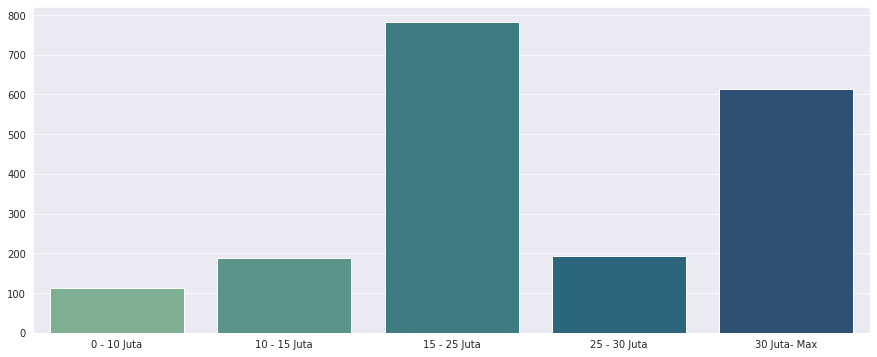

In [ ]:
harga_m2_cat = datas.harga_m2_kategori.value_counts()

plt.figure(figsize=(15,6))
sns.barplot(x=harga_m2_cat.index, y=harga_m2_cat.values, palette="crest")

In [ ]:
datas.to_csv("data_rumah_bersih.csv", index=False)

In [ ]:
datas.shape

(1892, 10)

# Find Lat Long Alamat

In [ ]:
datas = pd.read_csv("/content/data_rumah_bersih.csv")
datas.columns

Index(['nama_rumah', 'kamar_mandi', 'kamar_tidur', 'luas_m2', 'harga',
       'harga_m2', 'alamat', 'link', 'harga_kategori', 'harga_m2_kategori'],
      dtype='object')

In [ ]:
# code for getting the latitude and longitude
def get_lati_long(alamat):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Jakarta, Indonesia'.format(alamat))
        lat_lng_coords = g.latlng
    print(lat_lng_coords)
    return lat_lng_coords

In [ ]:
datas['lat_long'] = datas.alamat.apply(get_lati_long)


In [ ]:
datas.head()

,nama_rumah,kamar_mandi,kamar_tidur,luas_m2,harga,harga_m2,alamat,link,harga_kategori,harga_m2_kategori,lat_long
0,rumah baru patra kuningan,8,8,4617,300000000000,150000000,"patra, gatot subroto, kuningan, jakarta, Patra...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max,"[-6.234259999999949, 106.83154000000007]"
1,Hunian mewah 3 lantai di lengkapi Rooftop loka...,4,4,95,173000000000,2790322581,"jagakarsa, jakarta timur, Jagakarsa, Jakarta S...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max,"[-6.3344999999999345, 106.81966000000006]"
2,"5 Bedrooms Rumah Kebayoran Baru, Jakarta Selat...",5,5,914,170000000000,175983437,"Kebayoran Baru, Jakarta Selatan, DKI Jakarta",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max,"[-6.251469999999927, 106.79754000000008]"
3,Rumah Dijual Pondok Indah,5,5,1619,110000000000,68750000,"Pondok Indah, Pondok Indah, Jakarta Selatan, D...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max,"[-6.268569999999954, 106.78056000000004]"
4,Dijual rumah pangeran antasari mewah & Elite,6,5,936,102000000000,39968652,"jl pangeran antasari, Antasari, Jakarta Selata...",https://www.rumah.com/listing-properti/dijual-...,20 M - Max,30 Juta- Max,"[-6.261929329446686, 106.8126704313298]"


In [ ]:
datas.to_csv('data_rumah_bersih_lat_long.csv', index=False)